openDesign version = 1.6  
notebook version = 20250610

___

In [1]:
import numpy as np
import pandas as pd
import os
from openDesign.generator import Para, gene_generator
from openDesign.generator_multi import multigene_generator
from openDesign.utils import generate_sangong

## 目前接受一下几种探针的设计，但是，请不要把多种探放到一个文件里，一个文件中只可以包含一种探针，例如mRNA，基因组region，人工序列或者TE。

基因组region格式: chr1_start_end

mRNA/cDNA格式: Gad2

TE序列格式：TE_family_XXX 或 TE_class_XXX 或 TE_subfamily_XXX

人工序列格式：Artificial_XXX

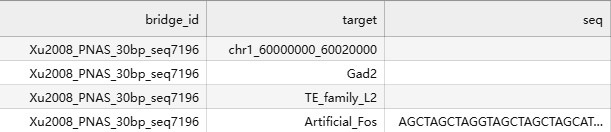

# Change input file name

In [2]:
input_filename = "Test.csv"

In [ ]:
pathsplit = os.path.split(input_filename)
rootpath = pathsplit[0]
file_output = os.path.join(rootpath, input_filename.split(".")[0] + "_results.csv")
file_output_sangong = os.path.join(rootpath, input_filename.split(".")[0] + "_results_sangong.csv")

def input_format(x):
    return x.strip().replace('\n', '')
genes = pd.read_csv(input_filename, sep=",")
genes.columns = ["bridge_id", "target", "seq"]
genes.loc[:,"bridge_id"] = genes.loc[:,"bridge_id"].apply(input_format)
try:
    genes.loc[:,"seq"] = genes.loc[:,"seq"].apply(input_format)
except:
    pass
genes.loc[:,"target"] = genes.loc[:,"target"].apply(input_format)
print(str(genes.shape))
genes

In [4]:
BKGdf = pd.read_csv("/media/duan/DuanLab_Data/openFISH/ProbeGenerator/openDesign/Mouse_Brain_Background.csv", index_col=0)

In [ ]:
para = Para(
        gc_thred=[20,80],  # GC含量允许范围，默认为20%-80%
        sCelsius = 47,  # 杂交温度，全部特异性部分的Tm会大于这个值
        nCelsius = 37, # 非特异性结合允许的最大Tm值，全部非特异性部分的Tm会小于这个值
        df_conc = 30, # 甲酰胺浓度，单位是%
        na_conc=0.390,  # 单价离子浓度，单位是M
        mg_conc=0.0, # 二价离子浓度， 单位是M
        bseqs_path = "./BridgeSequence/Bridges_used_for_assemble_20250827.tsv", # bridgeSeq的文件
        UsingPadfile = "./BridgeSequence/UsingPad.fa", # 正在使用的Pad，用于体系内人工序列交叉比对
        TaxonomyID = "10090", #物种ID，10090或者9606或3847
        P1evalue = 100, # 对P1进行BLAST时考虑的最大evalue
        P2evalue =5, # 对P2进行BLAST时考虑的最大evalue
        strand="minus", # 针对mRNA，Artificial填minus，针对cDNA填plus, TE,Genome填both
        BLACK_FA = "./BridgeSequence/BLACK_LIST_FULL.fa", # 黑名单文件，fasta格式
        gtype = 'gene', # 针对mRNA，cDNA，下载序列是保留的区域，可填gene,CDS,exon
        max_threads = 64, # 允许最大线程
        max_memory = 256, # 允许使用的最多memory
        #background_list = BKGdf['0'].to_list(),
        background_list = [],
        
        # 以下为探针设计时所涉及的一些本地文件，如果设计mouse，可以忽略human的相关参数，反之亦然
        # NCBI的key和email，用于mRNA序列的自动下载
        
        # BLASTn 使用的基因组fasta文件，如果是非基因组探针，可以忽略
        # https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000001635.27/
        # https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000001405.39/
        mouse_fasta_path = "../blastndb/mouse_GRCm39/data/GCF_000001635.27/GCF_000001635.27_GRCm39_genomic.fna",
        human_fasta_path = "../blastndb/human_GRCh38.p13/data/GCF_000001405.39/GCF_000001405.39_GRCh38.p13_genomic.fna",
        # blastn命令行路径
        blastn_path = '~/software/ncbi-blast-2.15.0+/bin/blastn',
        # bowtie2命令行路径
        bowtie2_path = 'bowtie2',
        # bowtie2的参考基因组index
        bowtie2_mouse_db = '/media/duan/sda2/Reference_DataBase/mm39/bowtie2index/GRCm39',
        bowtie2_human_db = '/media/duan/sda2/Reference_DataBase/refdata-gex-GRCh38-2020-A/bowtie2index/GRCh38',
        # refseq_rna路径，如果是设计基因组探针，可以忽略
        ref_seq_path = "../blastndb/refseq_rna",
        # BLASTn 使用的基因组比对文件，如果是非基因组探针，可以忽略
        mouse_genome_path = "../blastndb/GCF_000001635.27_top_level",
        human_genome_path = "../blastndb/GCF_000001405.39_top_level",
        # see SoloTE
        rmsk_path = '/media/duan/sda2/Reference_DataBase/mm39/mm39_rmsk.txt.gz',
        bedtools_path = 'bedtools',
        rmsk_bed = '/media/duan/sda2/Reference_DataBase/mm39/mm39_rmsk.bed'
        )

results = multigene_generator(genes, para)
results.to_csv(file_output, sep=",")

---

---

In [6]:
KEEP_INDICES = [
    1,5,
    232,235,
    386,389,
    1172,1177,
    1623,1638,
    1783,1790,
    2184,2186,
    2423,2415,
    2521,2527,
    2674,2676,
    2826,2832,
    3161,3168,
    3500,3505,
    4062,4069,
    4642,4651,
    4893,4897,
    
] # input index of selected probes manually
results = results.loc[KEEP_INDICES, :].copy()
results = results.reset_index(drop = True)

In [ ]:
final_df = generate_sangong(results)
final_df.to_csv(file_output_sangong, sep=",", index = False)
final_df